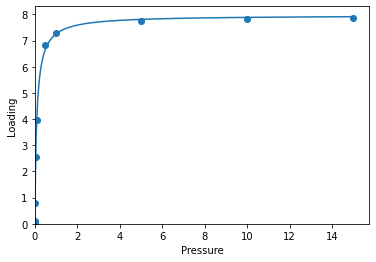

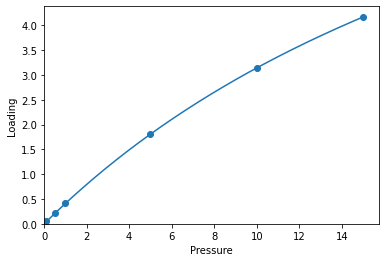

-------------------------------------------------
2282[[Loaded isotherm vairable for SF6,N2]]
Langmuir identified model parameters:
	M = 7.965185
	K = 10.117531
('RMSE = ', 0.08452001522482179)
Langmuir identified model parameters:
	M = 12.011291
	K = 0.035409
('RMSE = ', 0.005093817412728339)


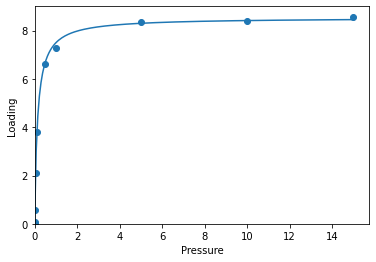

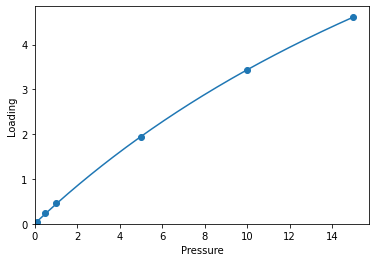

-------------------------------------------------
2334[[Loaded isotherm vairable for SF6,N2]]
Langmuir identified model parameters:
	M = 8.534236
	K = 7.210925
('RMSE = ', 0.11933054020076066)
Langmuir identified model parameters:
	M = 14.665079
	K = 0.030628
('RMSE = ', 0.012374562146935057)


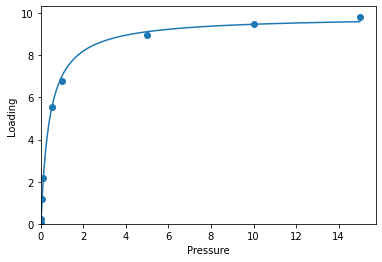

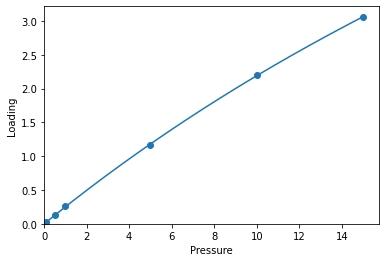

-------------------------------------------------
2537[[Loaded isotherm vairable for SF6,N2]]
Langmuir identified model parameters:
	M = 9.851583
	K = 2.495672
('RMSE = ', 0.14080860918281551)
Langmuir identified model parameters:
	M = 15.041840
	K = 0.017049
('RMSE = ', 0.004957131108563946)


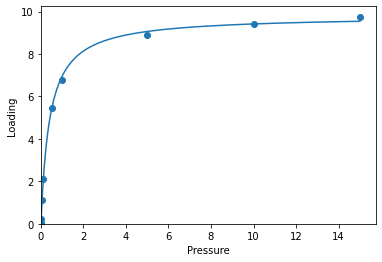

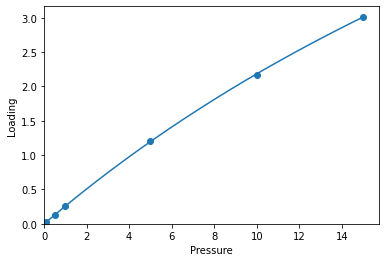

-------------------------------------------------
2538[[Loaded isotherm vairable for SF6,N2]]
Langmuir identified model parameters:
	M = 9.801618
	K = 2.451110
('RMSE = ', 0.11766298243386249)
Langmuir identified model parameters:
	M = 12.392835
	K = 0.021396
('RMSE = ', 0.0056039821115482225)


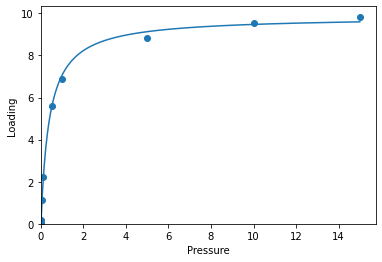

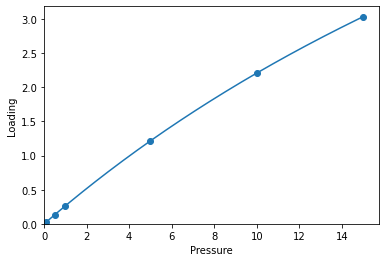

-------------------------------------------------
2539[[Loaded isotherm vairable for SF6,N2]]
Langmuir identified model parameters:
	M = 9.848926
	K = 2.552104
('RMSE = ', 0.1520551647647361)
Langmuir identified model parameters:
	M = 12.018125
	K = 0.022506
('RMSE = ', 0.0019331275374421886)


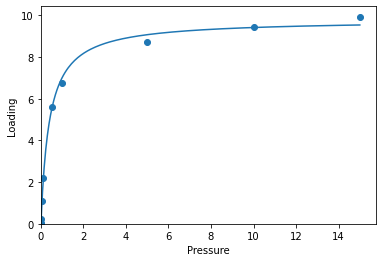

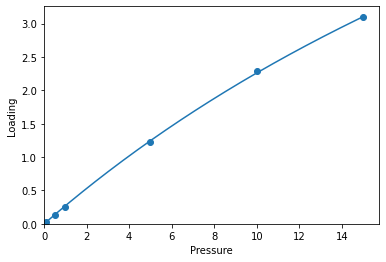

-------------------------------------------------
2540[[Loaded isotherm vairable for SF6,N2]]
Langmuir identified model parameters:
	M = 9.787791
	K = 2.532356
('RMSE = ', 0.2013629587236348)
Langmuir identified model parameters:
	M = 12.169697
	K = 0.022814
('RMSE = ', 0.009959620203184433)


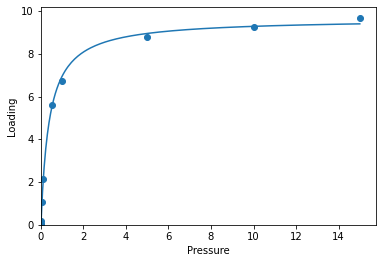

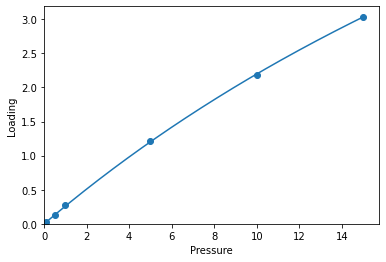

-------------------------------------------------
2541[[Loaded isotherm vairable for SF6,N2]]
Langmuir identified model parameters:
	M = 9.640996
	K = 2.593588
('RMSE = ', 0.14929421334586948)
Langmuir identified model parameters:
	M = 12.648992
	K = 0.021035
('RMSE = ', 0.005111150894939102)


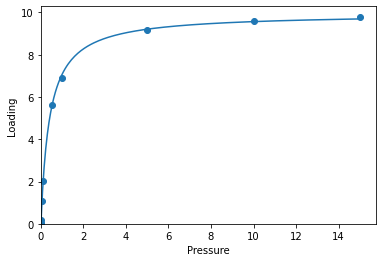

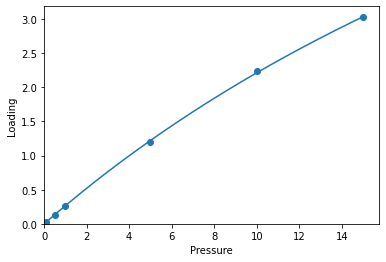

-------------------------------------------------
2542[[Loaded isotherm vairable for SF6,N2]]
Langmuir identified model parameters:
	M = 9.956531
	K = 2.466272
('RMSE = ', 0.08505155430202985)
Langmuir identified model parameters:
	M = 11.767312
	K = 0.023167
('RMSE = ', 0.011390312263334063)


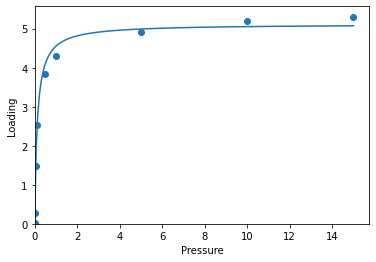

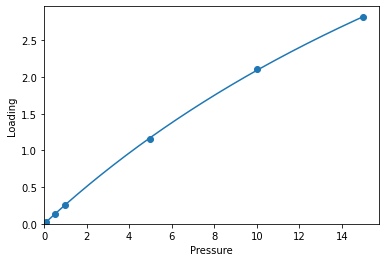

-------------------------------------------------
2549[[Loaded isotherm vairable for SF6,N2]]
Langmuir identified model parameters:
	M = 5.115626
	K = 8.009828
('RMSE = ', 0.16856320536546873)
Langmuir identified model parameters:
	M = 9.389164
	K = 0.028638
('RMSE = ', 0.008082342955972927)


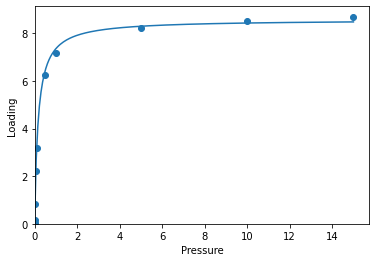

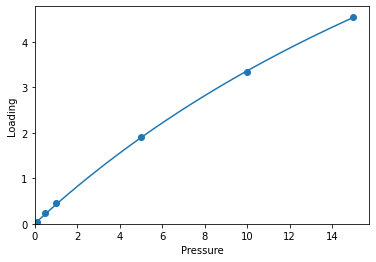

-------------------------------------------------
2569[[Loaded isotherm vairable for SF6,N2]]
Langmuir identified model parameters:
	M = 8.569274
	K = 6.022504
('RMSE = ', 0.1708359527351523)
Langmuir identified model parameters:
	M = 15.067300
	K = 0.028772
('RMSE = ', 0.016114709223591036)


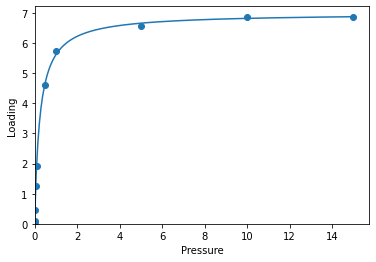

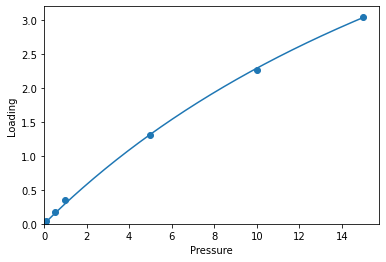

-------------------------------------------------
2633[[Loaded isotherm vairable for SF6,N2]]
Langmuir identified model parameters:
	M = 6.989563
	K = 4.065952
('RMSE = ', 0.09477507510345042)
Langmuir identified model parameters:
	M = 8.707932
	K = 0.035678
('RMSE = ', 0.019627754709009255)


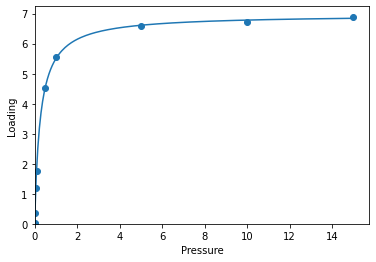

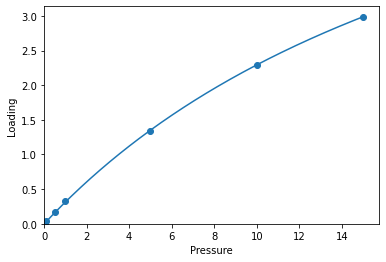

-------------------------------------------------
2824[[Loaded isotherm vairable for SF6,N2]]
Langmuir identified model parameters:
	M = 6.966353
	K = 3.735274
('RMSE = ', 0.06708924537054012)
Langmuir identified model parameters:
	M = 7.568658
	K = 0.043467
('RMSE = ', 0.0068584560775884155)
-------------------------------------------------
Calculated Adsorbent
-------------------------------------------------
2282
2334
2537
2538
2539
2540
2541
2542
2549
2569
2633
2824



In [1]:
#------------Bring modules------------------------------------
import pyiast
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import csv

#------------READ csv file (list of matarial names)------------

# --- Example -------
#   NAME
#   ABW_1
#   APC_1
#   RRO_1
#    .
#    .
#    .
#    .
#   ZON_1

df_NAME=pd.read_csv("NAME.csv")


#------------Make hollow list for calculated result(matarial names)---
RESULT_NAME=""



#------------Calculation-------------------------------------

for Z in df_NAME["NAME"]:
    ZN=str(Z)
   
    #------------Load isotherm loading------------------------
    df_SF6=pd.read_csv(ZN+'_SF6.csv')
    df_N2=pd.read_csv(ZN+'_N2.csv')
    uptake1=df_SF6['q'].tail(1)
    uptake2=df_N2['q'].tail(1)



    #----------No calculation for uptake < 0.5 (adsorbate)----
    if float(uptake1) < 0.01 or  float(uptake2) < 0.00001 :
        pass
    #----------Calculation for uptake < 0.5 (adsorbate)-----
    else:
        f_list_tmp =[ZN+'_SF6.csv',ZN+'_N2.csv']
        df_ISO_list=[]
        
        RESULT_NAME += f"{ZN}\n"
    
        for f in f_list_tmp:
            df_tmp = pd.read_csv(f)
            df_ISO_list.append(df_tmp)   
    
        iso_list = []
        g_difference_list= []
        for N in range(2): 
            try:
                iso_tmp = pyiast.ModelIsotherm(df_ISO_list[N],loading_key = 'q',
                                                   pressure_key = 'P',model = 'Langmuir')
                pyiast.plot_isotherm(iso_tmp)
                iso_list.append(iso_tmp)
            except:
                try:                     
                    iso_tmp = pyiast.ModelIsotherm(df_ISO_list[N],loading_key = 'q',
                                                   pressure_key = 'P',model = 'Quadratic')
                    pyiast.plot_isotherm(iso_tmp)
                    iso_list.append(iso_tmp)
                    
                except:
                    iso_tmp = pyiast.ModelIsotherm(df_ISO_list[N],loading_key = 'q',
                                                   pressure_key = 'P',model = 'Henry')
                    pyiast.plot_isotherm(iso_tmp)
                    iso_list.append(iso_tmp)



        #----------SAVE pyIAST result to bin file----------
    f_tmp = open('iso_'+ZN+'_saved.bin','wb')
    pickle.dump(iso_list, f_tmp)
    f_tmp.close()

    f_tmp_new = open('iso_'+ZN+'_saved.bin','rb')
    i_ISO_new = pickle.load(f_tmp_new)
    f_tmp_new.close()
    print('-------------------------------------------------')
    print(ZN+'[[Loaded isotherm vairable for SF6,N2]]')
    for i in range(len(i_ISO_new)):
          i_ISO_new[i].print_params()
    del iso_list[:]
    del g_difference_list[:]
    del f_list_tmp[:]
    del df_ISO_list[:]
        
#---------Show and Save Calculated matarial names---------- 

print('-------------------------------------------------')
print('Calculated Adsorbent')
print('-------------------------------------------------')
print(RESULT_NAME)
        
with open('list.csv', 'w', newline='') as f:
    f.write('NAME\n')
    f.write(RESULT_NAME)
    f.close    
